# import libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

# check library versions
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
# print('matplotlib version:', plt.__version__)

numpy version: 1.21.5
pandas version: 1.4.2


# load csv file and check dataframe

In [2]:
# create dataframe and check if it works
csv_path_accidents = "../data/01-01-2012_31-12-2021/Ongevallengegevens/ongevallen.csv" # 2012 to 2021
# csv_path_accidents = "C:/Users/shobe/Documents/school/minor AI/personal_project/01-01-2012_31-12-2021/01-01-2012_31-12-2021/Ongevallengegevens/ongevallen.csv" # desktop
df_accidents = pd.read_csv(csv_path_accidents, sep=',')
df_accidents.columns =["VKL_NUMMER","REGNUMMER","PVOPGEM","DATUM_VKL","DAG_CODE","MND_NUMMER","JAAR_VKL","TIJDSTIP","UUR","DDL_ID","AP3_CODE","AP4_CODE","AP5_CODE","ANTL_SLA","ANTL_DOD","ANTL_GZH","ANTL_SEH","ANTL_GOV","ANTL_PTJ","ANTL_TDT","MNE_CODE","AOL_ID","NIVEAUKOP","WSE_ID","WSE_AN","BEBKOM","MAXSNELHD","WVL_ID","WVG_ID","WVG_AN","WDK_ID","WDK_AN","LGD_ID","ZAD_ID","WGD_CODE_1","WGD_CODE_2","BZD_ID_VM1","BZD_ID_VM2","BZD_ID_VM3","BZD_VM_AN","BZD_ID_IF1","BZD_ID_IF2","BZD_ID_IF3","BZD_IF_AN","BZD_ID_TA1","BZD_ID_TA2","BZD_ID_TA3","BZD_TA_AN","JTE_ID","WVK_ID","HECTOMETER","FK_VELD5","HUISNUMMER","GME_ID","GME_NAAM","PVE_CODE","PVE_NAAM","KDD_NAAM","PLT_NAAM","DIENSTCODE","DIENSTNAAM","DISTRCODE","DISTRNAAM","DAGTYPE","IND_ALC","WEEKNR"]
df_accidents.head(10)

C:\Users\Stefan Hobeijn\AppData\Local\Temp\ipykernel_14216\3875036511.py:4: DtypeWarning: Columns (1,2,24,25,29,31,34,35,39,43,47,52,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df_accidents = pd.read_csv(csv_path_accidents, sep=',')


,VKL_NUMMER,REGNUMMER,PVOPGEM,DATUM_VKL,DAG_CODE,MND_NUMMER,JAAR_VKL,TIJDSTIP,UUR,DDL_ID,...,PVE_NAAM,KDD_NAAM,PLT_NAAM,DIENSTCODE,DIENSTNAAM,DISTRCODE,DISTRNAAM,DAGTYPE,IND_ALC,WEEKNR
0,20140135691,2014121457.0,J,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20140135692,2014273612.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20140135693,2014095971.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20140135694,2014081170.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,WZ,WZ,112.0,WNZ District Noord,NaN,NaN,NaN
4,20140135695,2014218979.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20140135696,2014327152.0,J,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,20140135698,2014272113.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20140135699,2014334206.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20140135700,2014326638.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,20140135701,2014037969.0,NaN,NaN,NaN,NaN,2014,NaN,NaN,NaN,...,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,NaN,NaN,NaN


next to code blocks do the same but the second one is significantly faster

# drop unnecessary columns

In [5]:
# drop columns with less than x non empty in cells
threshold = 100000
df_2 = df_accidents
bad_rows = []
for i, c in df_accidents.iteritems():
    k = c.count()
    if k <= threshold:
        bad_rows.append(i)
df_2 = df_2.drop(columns=bad_rows)
df_2.head(10)

,VKL_NUMMER,REGNUMMER,JAAR_VKL,AP3_CODE,ANTL_PTJ,AOL_ID,NIVEAUKOP,WSE_ID,BEBKOM,MAXSNELHD,...,GME_ID,GME_NAAM,PVE_CODE,PVE_NAAM,KDD_NAAM,PLT_NAAM,DIENSTCODE,DIENSTNAAM,DISTRCODE,DISTRNAAM
0,20140135691,2014121457.0,2014,UMS,5,9,E,1.0,NaN,30.0,...,1931,Krimpenerwaard,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
1,20140135692,2014273612.0,2014,UMS,3,9,E,1.0,NaN,120.0,...,1892,Zuidplas,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
2,20140135693,2014095971.0,2014,UMS,2,0,S,1.0,NaN,50.0,...,518,'s-Gravenhage,ZH,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
3,20140135694,2014081170.0,2014,UMS,2,0,E,1.0,NaN,100.0,...,518,'s-Gravenhage,ZH,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,WZ,WZ,112.0,WNZ District Noord
4,20140135695,2014218979.0,2014,LET,2,0,G,4.0,NaN,30.0,...,534,Hillegom,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
5,20140135696,2014327152.0,2014,LET,2,9,S,1.0,NaN,50.0,...,1892,Zuidplas,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
6,20140135698,2014272113.0,2014,UMS,2,0,G,5.0,NaN,50.0,...,513,Gouda,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
7,20140135699,2014334206.0,2014,UMS,1,9,E,NaN,NaN,NaN,...,518,'s-Gravenhage,ZH,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
8,20140135700,2014326638.0,2014,UMS,2,0,G,4.0,NaN,50.0,...,513,Gouda,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN
9,20140135701,2014037969.0,2014,UMS,2,0,G,5.0,NaN,50.0,...,518,'s-Gravenhage,ZH,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN


# plot yearly, nationally and apply linear regression

range(2012, 2022)
[99353, 102160, 94593, 113289, 124992, 123930, 128225, 134617, 103578, 114219]


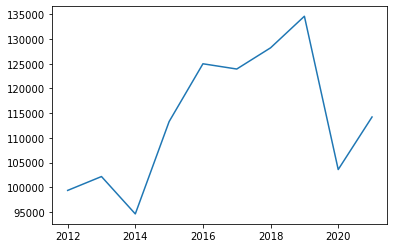

In [7]:
# plot yearly accidents
min_year = df_2.min(axis='rows', numeric_only=True)[1].astype(int)
max_year = df_2.max(axis='rows', numeric_only=True)[1].astype(int)
year = range(min_year, max_year + 1)
n_accidents = []
for i, j in enumerate(year):
    n = 0
    for k in df_2.iloc[:,2]:
        if j == k:
            n+=1
    n_accidents.insert(i, n)

print(year)
print(n_accidents)
fig, ax = plt.subplots()
ax.plot(year, n_accidents)
plt.show()

In [8]:
print(year)
print(n_accidents)
year_2 = np.array(year).reshape(-1, 1)
n_accidents_2 = n_accidents
linear_regressor = LinearRegression()
linear_regressor.fit(year_2, n_accidents_2)
Y_pred = linear_regressor.predict(year_2)

range(2012, 2022)
[99353, 102160, 94593, 113289, 124992, 123930, 128225, 134617, 103578, 114219]


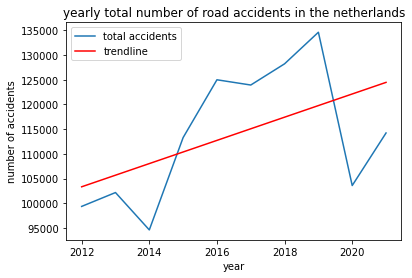

In [9]:
# show proper figure
plt.title("yearly total number of road accidents in the netherlands")
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(year, n_accidents, label="total accidents")
plt.plot(year, Y_pred, color="red", label="trendline")
plt.legend()
plt.show()

# plot yearly, per province and apply linear regression

In [10]:
print(df_2["PVE_NAAM"].unique())
print(df_2["PVE_CODE"].unique())

['Zuid-Holland' 'Noord-Brabant' 'Limburg' 'Gelderland' 'Flevoland'
 'Utrecht' 'Noord-Holland' 'Friesland' 'Groningen' 'Drenthe' 'Zeeland'
 'Overijssel']
['ZH' 'NB' 'LB' 'GL' 'FL' 'UT' 'NH' 'FR' 'GR' 'DR' 'ZL' 'OV']


In [11]:
df_4 = df_2
df_4["PVE_NUMR"] = df_4["PVE_CODE"].map( {"ZH" : 1, "NB" : 2, "LB" : 3, "GL" : 4, "FL" : 5, "UT" : 6, "NH" : 7, "FR" : 8, "GR" : 9, "DR" : 10, "ZL" : 11, "OV" : 12} ).astype(int)
df_4.head(3)

,VKL_NUMMER,REGNUMMER,JAAR_VKL,AP3_CODE,ANTL_PTJ,AOL_ID,NIVEAUKOP,WSE_ID,BEBKOM,MAXSNELHD,...,GME_NAAM,PVE_CODE,PVE_NAAM,KDD_NAAM,PLT_NAAM,DIENSTCODE,DIENSTNAAM,DISTRCODE,DISTRNAAM,PVE_NUMR
0,20140135691,2014121457.0,2014,UMS,5,9,E,1.0,NaN,30.0,...,Krimpenerwaard,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,1
1,20140135692,2014273612.0,2014,UMS,3,9,E,1.0,NaN,120.0,...,Zuidplas,ZH,Zuid-Holland,REGIO ZUID HOLLAND-OV,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,1
2,20140135693,2014095971.0,2014,UMS,2,0,S,1.0,NaN,50.0,...,'s-Gravenhage,ZH,Zuid-Holland,STADSGEWEST HAAGLANDEN,Regionale Eenheid Den Haag,NaN,NaN,NaN,NaN,1


In [12]:
df_5 = df_4[["JAAR_VKL", "PVE_CODE", "PVE_NUMR"]]
df_5.head(5)

,JAAR_VKL,PVE_CODE,PVE_NUMR
0,2014,ZH,1
1,2014,ZH,1
2,2014,ZH,1
3,2014,ZH,1
4,2014,ZH,1


In [13]:
df_7 = pd.read_csv("df_6.csv", sep=',')
df_7["PVE_CODE"] = df_7["PROVINCE"].map({"ZH" : 1, "NB" : 2, "LB" : 3, "GL" : 4, "FL" : 5, "UT" : 6, "NH" : 7, "FR" : 8, "GR" : 9, "DR" : 10, "ZL" : 11, "OV" : 12}).astype(int)
df_7

,YEAR,PROVINCE,N_ACCIDENTS,PVE_CODE
0,2014,ZH,18208,1
1,2014,NB,15082,2
2,2014,LB,6436,3
3,2014,GL,12273,4
4,2014,FL,1595,5
...,...,...,...,...
115,2018,FR,3417,8
116,2018,GR,3566,9
117,2018,DR,2854,10
118,2018,ZL,2432,11


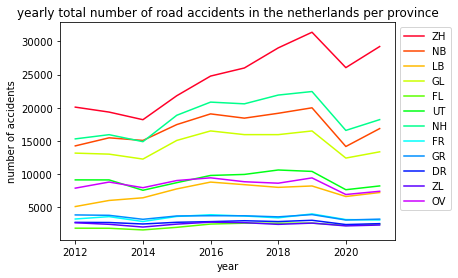

In [14]:
df_7.sort_values(by=["YEAR"])
year = df_7["YEAR"].unique()
year_2 = range(year.min(), year.max()+1)
provinces = df_7["PROVINCE"].unique()
n_provinces = len(provinces)

num_colors = n_provinces
cm = plt.get_cmap('gist_rainbow')
colors=[cm(1.*i/num_colors) for i in range(num_colors)]

for i, j in enumerate(provinces):
    line = []
    for k in year_2:
        point = df_7[(df_7["PROVINCE"] == j) & (df_7["YEAR"] == k)]
        line.append(point["N_ACCIDENTS"])
    line = np.array(line)
    plt.plot(year_2, line, label=j, color = colors[i])

plt.title("yearly total number of road accidents in the netherlands per province")
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

combineren met inwoners per provincie in plot over 10 jaar

In [15]:
target_province = "DR"
sub_df_7 = df_7[df_7["PROVINCE"]==target_province]
sub_df_7

,YEAR,PROVINCE,N_ACCIDENTS,PVE_CODE
9,2014,DR,2488,10
21,2020,DR,2403,10
33,2019,DR,3047,10
45,2021,DR,2539,10
57,2013,DR,2713,10
69,2012,DR,2735,10
81,2015,DR,2746,10
93,2016,DR,2843,10
105,2017,DR,2980,10
117,2018,DR,2854,10


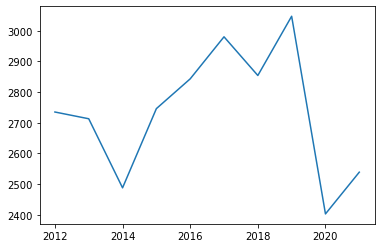

In [16]:
min_year = df_7["YEAR"].min()
max_year = df_7["YEAR"].max()
year = range(min_year, max_year + 1)
n_accidents = []
for i, j in enumerate(year):
    row = sub_df_7.loc[df_7["YEAR"]==j]
    n_accidents.insert(i, row["N_ACCIDENTS"])
fig, ax = plt.subplots()
ax.plot(year, n_accidents)
plt.show()

In [17]:
target_province = "GR"
df_7_2 = df_5.loc[df_5["PVE_CODE"] == target_province]
df_9 = df_7_2["JAAR_VKL"].value_counts()
df_10 = df_9.reset_index()
df_11 = df_10.sort_values("index", ignore_index=True)
print(df_7_2)
print(df_9)
print(df_10)
print(df_11)

         JAAR_VKL PVE_CODE  PVE_NUMR
272          2014       GR         9
274          2014       GR         9
276          2014       GR         9
279          2014       GR         9
281          2014       GR         9
...           ...      ...       ...
1138950      2021       GR         9
1138951      2021       GR         9
1138952      2021       GR         9
1138953      2021       GR         9
1138954      2021       GR         9

[35777 rows x 3 columns]
2019    3902
2012    3855
2013    3796
2016    3732
2017    3725
2015    3697
2018    3566
2021    3222
2014    3195
2020    3087
Name: JAAR_VKL, dtype: int64
   index  JAAR_VKL
0   2019      3902
1   2012      3855
2   2013      3796
3   2016      3732
4   2017      3725
5   2015      3697
6   2018      3566
7   2021      3222
8   2014      3195
9   2020      3087
   index  JAAR_VKL
0   2012      3855
1   2013      3796
2   2014      3195
3   2015      3697
4   2016      3732
5   2017      3725
6   2018      3566
7   2019  

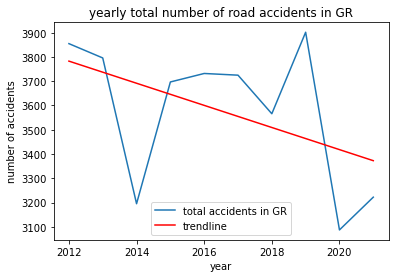

In [18]:
year = df_11.iloc[:,0]
n_accidents = df_11.iloc[:,1]
year_2 = np.array(year).reshape(-1, 1)
n_accidents_2 = n_accidents
linear_regressor = LinearRegression()
linear_regressor.fit(year_2, n_accidents_2)
Y_pred = linear_regressor.predict(year_2)
plt.title("yearly total number of road accidents in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(year, n_accidents, label="total accidents in " + target_province)
plt.plot(year, Y_pred, color="red", label="trendline")
plt.legend()
plt.show()

# find correlation

not enough data to find <br>
finding correlations to increas complexity

oorzaken meer ongelukken: <br>
meer inwoners: https://opendata.cbs.nl/statline/#/CBS/nl/dataset/70072NED/table?ts=1669975216124&fromstatweb=true <br>
meer verkeer <br>
weersomstandigheden <br>
wegkwaliteit <br>
zichtbaarheid <br>
verwarrende kruispunten <br>
snelheden (limiet en snelhijd bij het ongeluk)<br>
bebouwde kom <br>
mens/auto aanrijding correlatie bebouwde kom

data verzameld <br>
nu plots maken voor interessante verbanden

TODO: <br>
verband aantal ongelukken binnen buiten bebouwde kom en ongelukken met fietsen <br>
verband totale weglengte en totaal aantal ongelukken per provincie <br>
gradient voor kleur lijnen toevoegen
kijken naar verschillende soorten regressie

review:<br>
gradient voor kleur lijnen toevoegen


load datasets and make them usable

# import dataset about population

In [19]:
csv_path_population_residency = "../data/aantal_inwoners_en_voertuigen/Regionale_kerncijfers_Nederland_Bevolking_Huishoudens.csv"

df_population_residency = pd.read_csv(csv_path_population_residency, sep=";")

new_column_names = []
for i in enumerate(df_population_residency):
    new_column_name = i[1] + " (" + df_population_residency.iloc[0, i[0]] + ")"
    new_column_names.append(new_column_name)

df_population_residency.columns = new_column_names
df_population_residency = df_population_residency.drop([0]).reset_index(drop=True)
df_population_residency.to_csv("population_residency.csv", index=False)

In [20]:
df_population_residency_2 = pd.read_csv("population_residency.csv", decimal=",")
df_population_residency_2 = df_population_residency_2[df_population_residency_2["Perioden (jaar)"] != 2012]
df_population_residency_2["Perioden (jaar)"] -= 1
df_population_residency_2 = df_population_residency_2.reset_index(drop=True)
df_population_residency_2

,Regio's (naam),Perioden (jaar),Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal),...,Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Niet stedelijk (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²),Bevolking|Particuliere huishoudens|Particuliere huishoudens|Totaal aantal particuliere huishoudens (aantal),Bevolking|Particuliere huishoudens|Particuliere huishoudens|Eenpersoonshuishoudens (aantal),Bevolking|Particuliere huishoudens|Particuliere huishoudens|Huishoudens zonder kinderen (aantal),Bevolking|Particuliere huishoudens|Particuliere huishoudens|Huishoudens met kinderen (aantal),"Bevolking|Particuliere huishoudens|Particuliere huishoudens, relatief|Eenpersoonshuishoudens (%)","Bevolking|Particuliere huishoudens|Particuliere huishoudens, relatief|Huishoudens zonder kinderen (%)","Bevolking|Particuliere huishoudens|Particuliere huishoudens, relatief|Huishoudens met kinderen (%)",Bevolking|Particuliere huishoudens|Gemiddelde huishoudensgrootte (personen per 1 huishouden)
0,Groningen (PV),2012,581705,289275,292430,28423,29156,31929,36337,51319,...,208100,250,285911,124778,81124,80009,43.6,28.4,28.0,2.01
1,Groningen (PV),2013,582728,289820,292908,27753,28612,31873,36767,52125,...,206910,251,286645,125559,81429,79657,43.8,28.4,27.8,2.00
2,Groningen (PV),2014,583942,290840,293102,27188,28574,31359,37053,52777,...,199180,251,289552,129003,81243,79306,44.6,28.1,27.4,1.98
3,Groningen (PV),2015,583721,291058,292663,26637,28343,30701,36820,52753,...,198830,251,290294,129969,81513,78812,44.8,28.1,27.1,1.98
4,Groningen (PV),2016,583581,291291,292290,26271,28321,29966,36795,52387,...,198220,251,291322,131134,81591,78597,45.0,28.0,27.0,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Limburg (PV),2017,1117198,554944,562254,45079,48816,53113,63833,65651,...,278210,520,527922,198652,169708,159562,37.6,32.1,30.2,2.08
116,Limburg (PV),2018,1116137,554602,561535,44753,48534,51686,62892,65925,...,276130,520,529711,200960,170069,158682,37.9,32.1,30.0,2.07
117,Limburg (PV),2019,1117201,555327,561874,44626,47727,50927,61746,66719,...,275470,520,532321,203728,171058,157535,38.3,32.1,29.6,2.06
118,Limburg (PV),2020,1115872,555149,560723,44551,46966,50900,59759,66813,...,273880,520,533542,205045,172072,156425,38.4,32.3,29.3,2.05


In [21]:
csv_path_growth = "../data/aantal_inwoners_en_voertuigen/Regionale_kerncijfers_Nederland_Bevolkingsgroei.csv"
df_growth = pd.read_csv(csv_path_growth, sep=";")

new_column_names = []
for i in enumerate(df_growth):
    new_column_name = i[1] + " (" + df_growth.iloc[0, i[0]] + ")"
    new_column_names.append(new_column_name)

df_growth.columns = new_column_names
df_growth = df_growth.drop([0]).reset_index(drop=True)
df_growth.to_csv("growth.csv", index=False)

In [22]:
df_growth_2 = pd.read_csv("growth.csv", decimal=",") # added decimal so when using linear regression the decimal numbers are usable and not stored as strings
df_growth_2 = df_growth_2[df_growth_2["Perioden (jaar)"] != 2022]
df_growth_2 = df_growth_2.reset_index(drop=True)
df_growth_2

,Regio's (naam),Perioden (jaar),Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Geboorte (aantal),"Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Geboorte, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Sterfte (aantal),"Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Sterfte, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Geboorteoverschot (aantal),"Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Geboorteoverschot, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Doodsoorzaken|Nieuwvormingen (aantal),Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Doodsoorzaken|Ziekten van hart en vaatstelsel (aantal),...,"Bevolking|Bevolkingsontwikkeling|Verhuizingen|Binnenlands migratiesaldo, relatief (per 1 000 inwoners)","Bevolking|Bevolkingsontwikkeling|Verhuizingen|Verhuismobiliteit, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Immigratie (aantal),Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Emigratie (aantal),Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Migratiesaldo (aantal),"Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Migratiesaldo, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Inwoners op 31 december (aantal),Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Bevolkingsgroei (aantal),"Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Bevolkingsgroei, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Gemiddeld aantal inwoners (aantal)
0,Groningen (PV),2012,5604.0,9.6,5460.0,9.4,144.0,0.2,1763.0,1529.0,...,-0.2,110.2,6247.0,5458.0,789.0,1.4,581705.0,830.0,1.4,581290.0
1,Groningen (PV),2013,5326.0,9.1,5387.0,9.3,-61.0,-0.1,1679.0,1533.0,...,-0.5,110.7,6594.0,5197.0,1397.0,2.4,582728.0,1023.0,1.8,582216.5
2,Groningen (PV),2014,5414.0,9.3,5325.0,9.1,89.0,0.2,1695.0,1539.0,...,-3.3,116.0,8977.0,5935.0,3042.0,5.2,583942.0,1214.0,2.1,583335.0
3,Groningen (PV),2015,5329.0,9.1,5481.0,9.4,-152.0,-0.3,1725.0,1535.0,...,-10.1,126.7,11611.0,5818.0,5793.0,9.9,583721.0,-221.0,-0.4,583831.5
4,Groningen (PV),2016,5406.0,9.3,5583.0,9.6,-177.0,-0.3,1766.0,1491.0,...,-10.5,130.7,12156.0,5975.0,6181.0,10.6,583581.0,-140.0,-0.2,583651.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Limburg (PV),2017,8821.0,7.9,11845.0,10.6,-3024.0,-2.7,3675.0,3096.0,...,-0.5,100.6,14391.0,11056.0,3335.0,3.0,1117198.0,-348.0,-0.3,1117372.0
116,Limburg (PV),2018,8710.0,7.8,11916.0,10.7,-3206.0,-2.9,3571.0,3010.0,...,-0.8,95.0,15148.0,12147.0,3001.0,2.7,1116137.0,-1061.0,-0.9,1116667.5
117,Limburg (PV),2019,8668.0,7.8,12007.0,10.8,-3339.0,-3.0,3636.0,3080.0,...,-0.4,94.6,16975.0,12126.0,4849.0,4.3,1117201.0,1064.0,1.0,1116669.0
118,Limburg (PV),2020,8652.0,7.7,13625.0,12.2,-4973.0,-4.5,3650.0,3002.0,...,1.4,98.3,NaN,NaN,NaN,NaN,1115872.0,-1329.0,-1.2,1116536.5


In [23]:
df_growth_3 = df_growth_2.drop(["Regio's (naam)", "Perioden (jaar)"], axis=1)
df_population_2 = pd.concat([df_population_residency_2, df_growth_3], axis=1)
df_population_2.columns

Index(['Regio's (naam)', 'Perioden (jaar)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|

save and load to fix data types, numers are not counted as strings anymore <br>
added first row to the column name in brackets: ()

# make comparison accidents and total population and population density
add province code to population dataset <br>
add graphs <br>
each province will have its own graph with accidents, population and population density

all values are recorded on the 1st of january
this means the amount of accidents is used with the population of one year after (e.g. total number of accidents on 31 december 2014 with total population on 1 january 2015)

In [26]:
df_population_2["Regio's (naam)"].unique()

array(['Groningen (PV)', 'Fryslân (PV)', 'Drenthe (PV)',
       'Overijssel (PV)', 'Flevoland (PV)', 'Gelderland (PV)',
       'Utrecht (PV)', 'Noord-Holland (PV)', 'Zuid-Holland (PV)',
       'Zeeland (PV)', 'Noord-Brabant (PV)', 'Limburg (PV)'], dtype=object)

In [27]:
df_population_2["PROVINCE"] = df_population_2["Regio's (naam)"].map({"Zuid-Holland (PV)" : "ZH", "Noord-Brabant (PV)" : "NB", "Limburg (PV)" : "LB", "Gelderland (PV)" : "GL", "Flevoland (PV)" : "FL", "Utrecht (PV)" : "UT", "Noord-Holland (PV)" : "NH", "Fryslân (PV)" : "FR", "Groningen (PV)" : "GR", "Drenthe (PV)" : "DR", "Zeeland (PV)" : "ZL", "Overijssel (PV)" : "OV"} )
df_population_2.head(5)

,Regio's (naam),Perioden (jaar),Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal),...,"Bevolking|Bevolkingsontwikkeling|Verhuizingen|Verhuismobiliteit, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Immigratie (aantal),Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Emigratie (aantal),Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Migratiesaldo (aantal),"Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Migratiesaldo, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Inwoners op 31 december (aantal),Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Bevolkingsgroei (aantal),"Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Bevolkingsgroei, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Gemiddeld aantal inwoners (aantal),PROVINCE
0,Groningen (PV),2012,581705,289275,292430,28423,29156,31929,36337,51319,...,110.2,6247.0,5458.0,789.0,1.4,581705.0,830.0,1.4,581290.0,GR
1,Groningen (PV),2013,582728,289820,292908,27753,28612,31873,36767,52125,...,110.7,6594.0,5197.0,1397.0,2.4,582728.0,1023.0,1.8,582216.5,GR
2,Groningen (PV),2014,583942,290840,293102,27188,28574,31359,37053,52777,...,116.0,8977.0,5935.0,3042.0,5.2,583942.0,1214.0,2.1,583335.0,GR
3,Groningen (PV),2015,583721,291058,292663,26637,28343,30701,36820,52753,...,126.7,11611.0,5818.0,5793.0,9.9,583721.0,-221.0,-0.4,583831.5,GR
4,Groningen (PV),2016,583581,291291,292290,26271,28321,29966,36795,52387,...,130.7,12156.0,5975.0,6181.0,10.6,583581.0,-140.0,-0.2,583651.0,GR


In [28]:
df_population_2.columns

Index(['Regio's (naam)', 'Perioden (jaar)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|

In [29]:
df_population_3 = df_population_2[["Perioden (jaar)", "Regio's (naam)", "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)", "Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)", "PROVINCE"]]
df_population_3 = df_population_3.rename(columns={"Perioden (jaar)": "YEAR", "Regio's (naam)": "PROVINCE_NAME", "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)": "TOTAL_POPULATION", "Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)": "POPULATION_DENSITY"})
df_population_3

,YEAR,PROVINCE_NAME,TOTAL_POPULATION,POPULATION_DENSITY,PROVINCE
0,2012,Groningen (PV),581705,250,GR
1,2013,Groningen (PV),582728,251,GR
2,2014,Groningen (PV),583942,251,GR
3,2015,Groningen (PV),583721,251,GR
4,2016,Groningen (PV),583581,251,GR
...,...,...,...,...,...
115,2017,Limburg (PV),1117198,520,LB
116,2018,Limburg (PV),1116137,520,LB
117,2019,Limburg (PV),1117201,520,LB
118,2020,Limburg (PV),1115872,520,LB


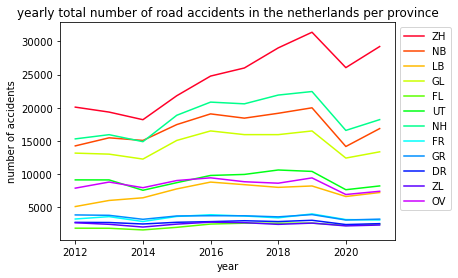

In [30]:
df_7.sort_values(by=["YEAR"])
year = df_7["YEAR"].unique()
year_2 = range(year.min(), year.max()+1)
provinces = df_7["PROVINCE"].unique()
n_provinces = len(provinces)

num_colors = n_provinces
cm = plt.get_cmap('gist_rainbow')
colors=[cm(1.*i/num_colors) for i in range(num_colors)]

for i, j in enumerate(provinces):
    line = []
    for k in year_2:
        point = df_7[(df_7["PROVINCE"] == j) & (df_7["YEAR"] == k)]
        line.append(point["N_ACCIDENTS"])
    line = np.array(line)
    plt.plot(year_2, line, label=j, color = colors[i])

plt.title("yearly total number of road accidents in the netherlands per province")
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

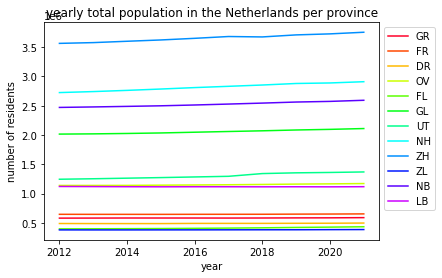

In [31]:
df_population_3.sort_values(by=["YEAR"])
year = df_population_3["YEAR"].unique()
year_2 = range(year.min(), year.max()+1)
provinces = df_population_3["PROVINCE"].unique()
n_provinces = len(provinces)

num_colors = n_provinces
cm = plt.get_cmap('gist_rainbow')
colors=[cm(1.*i/num_colors) for i in range(num_colors)]

for i, j in enumerate(provinces):
    line = []
    for k in year_2:
        point = df_population_3[(df_population_3["PROVINCE"] == j) & (df_population_3["YEAR"] == k)]
        line.append(point["TOTAL_POPULATION"])
    line = np.array(line)
    plt.plot(year_2, line, label=j, color = colors[i])

plt.title("yearly total population in the Netherlands per province")
plt.xlabel("year")
plt.ylabel("number of residents")

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

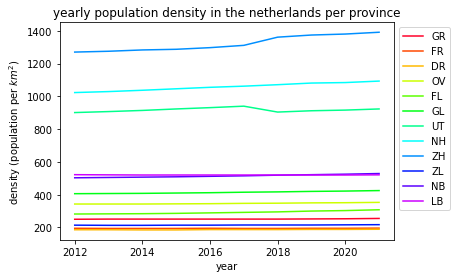

In [32]:
df_population_3.sort_values(by=["YEAR"])
year = df_population_3["YEAR"].unique()
year_2 = range(year.min(), year.max()+1)
provinces = df_population_3["PROVINCE"].unique()
n_provinces = len(provinces)

num_colors = n_provinces
cm = plt.get_cmap('gist_rainbow')
colors=[cm(1.*i/num_colors) for i in range(num_colors)]

for i, j in enumerate(provinces):
    line = []
    for k in year_2:
        point = df_population_3[(df_population_3["PROVINCE"] == j) & (df_population_3["YEAR"] == k)]
        line.append(point["POPULATION_DENSITY"])
    line = np.array(line)
    plt.plot(year_2, line, label=j, color = colors[i])

plt.title("yearly population density in the netherlands per province")
plt.xlabel("year")
plt.ylabel("density (population per $km^{2}$)")

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

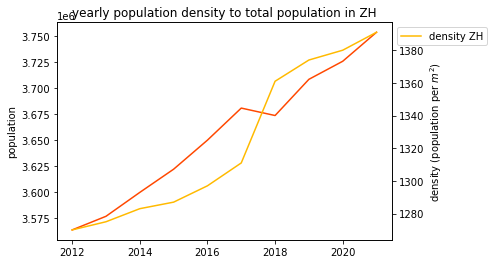

In [33]:
df_population_3.sort_values(by=["YEAR"])
year = df_population_3["YEAR"].unique()
year_2 = range(year.min(), year.max()+1)
provinces = df_population_3["PROVINCE"].unique()
n_provinces = len(provinces)

num_colors = n_provinces
cm = plt.get_cmap('gist_rainbow')
colors=[cm(1.*i/num_colors) for i in range(num_colors)]

j = "ZH"
line_population = []
line_density = []
for k in year_2:
    point_population = df_population_3[(df_population_3["PROVINCE"] == j) & (df_population_3["YEAR"] == k)]
    line_population.append(point_population["TOTAL_POPULATION"])
    point_density = df_population_3[(df_population_3["PROVINCE"] == j) & (df_population_3["YEAR"] == k)]
    line_density.append(point_density["POPULATION_DENSITY"])
line_population = np.array(line_population)
line_density = np.array(line_density)

fig, ax = plt.subplots()
ax.plot(year_2, line_population, label=("population " + j), color = colors[1])
ax.set_ylabel("population")
ax2 = ax.twinx()
ax2.plot(year_2, line_density, label=("density " + j), color = colors[2])
ax2.set_ylabel("density (population per $m^{2}$)")

plt.title("yearly population density to total population in " + j)
plt.xlabel("year")

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

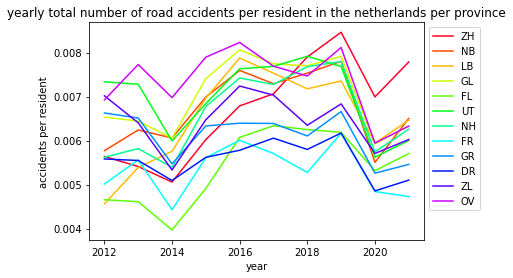

In [34]:
df_7.sort_values(by=["YEAR"])
year = df_7["YEAR"].unique()
year_2 = range(year.min(), year.max()+1)
provinces = df_7["PROVINCE"].unique()
n_provinces = len(provinces)

num_colors = n_provinces
cm = plt.get_cmap('gist_rainbow')
colors=[cm(1.*i/num_colors) for i in range(num_colors)]

for i, j in enumerate(provinces):
    line = []
    for k in year_2:
        accidents = df_7[(df_7["PROVINCE"] == j) & (df_7["YEAR"] == k)]["N_ACCIDENTS"]
        population = df_population_3[(df_population_3["PROVINCE"] == j) & (df_population_3["YEAR"] == k)]["TOTAL_POPULATION"]
        accidents_per_population = accidents.values / population.values
        line.append(accidents_per_population)
    line = np.array(line)
    plt.plot(year_2, line, label=j, color = colors[i])

plt.title("yearly total number of road accidents per resident in the netherlands per province")
plt.xlabel("year")
plt.ylabel("accidents per resident")

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# import dataset traffic and vehicles

all values are recorded on the 1st of january each year

all values are recorded on the 1st of january
this means the amount of accidents is used with the amount of vehicles of one year after (e.g. total number of accidents on 31 december 2014 with the total number of vehicles on 1 january 2015)

In [35]:
csv_path_vehicles = "../data/aantal_inwoners_en_voertuigen/Regionale_kerncijfers_Nederland_Voertuigen_2.csv"
# csv_path_vehicles = "C:/Users/shobe/Documents/school/minor AI/personal_project/aantal_inwoners_en_voertuigen-20221219T154519Z-001/aantal_inwoners_en_voertuigen/Regionale_kerncijfers_Nederland_Voertuigen_2.csv" # desktop
df_vehicles = pd.read_csv(csv_path_vehicles, sep=";")
new_column_names = []
for i in enumerate(df_vehicles):
    new_column_name = i[1] + " (" + df_vehicles.iloc[0, i[0]] + ")"
    new_column_names.append(new_column_name)
df_vehicles.columns = new_column_names
df_vehicles = df_vehicles.drop([0]).reset_index(drop=True)
df_vehicles.to_csv("traffic.csv", index=False)

In [36]:
df_vehicles_2 = pd.read_csv("traffic.csv", decimal=",")
df_vehicles_2 = df_vehicles_2[df_vehicles_2["Perioden (jaar)"] != 2012]
df_vehicles_2["Perioden (jaar)"] -= 1
df_vehicles_2 = df_vehicles_2.reset_index(drop=True)
df_vehicles_2

,Perioden (jaar),Regio's (naam),Verkeer en vervoer|Motorvoertuigen|Personenauto's (aantal),"Verkeer en vervoer|Motorvoertuigen|Personenauto's, relatief (per 1 000 inwoners)",Verkeer en vervoer|Motorvoertuigen|Personenauto's particulieren (aantal),"Verkeer en vervoer|Motorvoertuigen|Personenauto's particulieren, relatief (per 1 000 inwoners)",Verkeer en vervoer|Motorvoertuigen|Bedrijfsmotorvoertuigen (aantal),Verkeer en vervoer|Motorvoertuigen|Motorfietsen (aantal),"Verkeer en vervoer|Motorvoertuigen|Motorfietsen, relatief (per 1 000 inwoners)",Verkeer en vervoer|Motorvoertuigen|Voertuigen met bromfietskenteken (aantal),Verkeer en vervoer|Motorvoertuigen|Voertuigen met bromfietskenteken (%) (per 1 000 inwoners)
0,2012,Groningen (PV),259161.0,446.0,242790.0,417.0,34864.0,25167.0,43.0,33018.0,57.0
1,2012,Fryslân (PV),305956.0,473.0,291098.0,450.0,50144.0,30027.0,46.0,36627.0,57.0
2,2012,Drenthe (PV),249494.0,509.0,236925.0,484.0,34192.0,26091.0,53.0,25644.0,52.0
3,2012,Overijssel (PV),538102.0,472.0,498282.0,437.0,74839.0,51050.0,45.0,68158.0,60.0
4,2012,Flevoland (PV),325173.0,816.0,157691.0,396.0,46774.0,14878.0,37.0,21582.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...
115,2021,Noord-Holland (PV),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,2021,Zuid-Holland (PV),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,2021,Zeeland (PV),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,2021,Noord-Brabant (PV),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# compare amount of vehicles to amount of accidents

In [37]:
df_vehicles_2["Regio's (naam)"].unique()

array(['Groningen (PV)', 'Fryslân (PV)', 'Drenthe (PV)',
       'Overijssel (PV)', 'Flevoland (PV)', 'Gelderland (PV)',
       'Utrecht (PV)', 'Noord-Holland (PV)', 'Zuid-Holland (PV)',
       'Zeeland (PV)', 'Noord-Brabant (PV)', 'Limburg (PV)'], dtype=object)

In [38]:
df_vehicles_2["PROVINCE"] = df_vehicles_2["Regio's (naam)"].map( {"Zuid-Holland (PV)" : "ZH", "Noord-Brabant (PV)" : "NB", "Limburg (PV)" : "LB", "Gelderland (PV)" : "GL", "Flevoland (PV)" : "FL", "Utrecht (PV)" : "UT", "Noord-Holland (PV)" : "NH", "Fryslân (PV)" : "FR", "Groningen (PV)" : "GR", "Drenthe (PV)" : "DR", "Zeeland (PV)" : "ZL", "Overijssel (PV)" : "OV"} )
df_vehicles_2.head(5)

,Perioden (jaar),Regio's (naam),Verkeer en vervoer|Motorvoertuigen|Personenauto's (aantal),"Verkeer en vervoer|Motorvoertuigen|Personenauto's, relatief (per 1 000 inwoners)",Verkeer en vervoer|Motorvoertuigen|Personenauto's particulieren (aantal),"Verkeer en vervoer|Motorvoertuigen|Personenauto's particulieren, relatief (per 1 000 inwoners)",Verkeer en vervoer|Motorvoertuigen|Bedrijfsmotorvoertuigen (aantal),Verkeer en vervoer|Motorvoertuigen|Motorfietsen (aantal),"Verkeer en vervoer|Motorvoertuigen|Motorfietsen, relatief (per 1 000 inwoners)",Verkeer en vervoer|Motorvoertuigen|Voertuigen met bromfietskenteken (aantal),Verkeer en vervoer|Motorvoertuigen|Voertuigen met bromfietskenteken (%) (per 1 000 inwoners),PROVINCE
0,2012,Groningen (PV),259161.0,446.0,242790.0,417.0,34864.0,25167.0,43.0,33018.0,57.0,GR
1,2012,Fryslân (PV),305956.0,473.0,291098.0,450.0,50144.0,30027.0,46.0,36627.0,57.0,FR
2,2012,Drenthe (PV),249494.0,509.0,236925.0,484.0,34192.0,26091.0,53.0,25644.0,52.0,DR
3,2012,Overijssel (PV),538102.0,472.0,498282.0,437.0,74839.0,51050.0,45.0,68158.0,60.0,OV
4,2012,Flevoland (PV),325173.0,816.0,157691.0,396.0,46774.0,14878.0,37.0,21582.0,54.0,FL


In [39]:
df_vehicles_2.columns

Index(['Perioden (jaar)', 'Regio's (naam)',
       'Verkeer en vervoer|Motorvoertuigen|Personenauto's (aantal)',
       'Verkeer en vervoer|Motorvoertuigen|Personenauto's, relatief (per 1 000 inwoners)',
       'Verkeer en vervoer|Motorvoertuigen|Personenauto's particulieren (aantal)',
       'Verkeer en vervoer|Motorvoertuigen|Personenauto's particulieren, relatief (per 1 000 inwoners)',
       'Verkeer en vervoer|Motorvoertuigen|Bedrijfsmotorvoertuigen (aantal)',
       'Verkeer en vervoer|Motorvoertuigen|Motorfietsen (aantal)',
       'Verkeer en vervoer|Motorvoertuigen|Motorfietsen, relatief (per 1 000 inwoners)',
       'Verkeer en vervoer|Motorvoertuigen|Voertuigen met bromfietskenteken (aantal)',
       'Verkeer en vervoer|Motorvoertuigen|Voertuigen met bromfietskenteken (%) (per 1 000 inwoners)',
       'PROVINCE'],
      dtype='object')

In [40]:
df_vehicles_3 = df_vehicles_2[["Perioden (jaar)", "Regio's (naam)", "Verkeer en vervoer|Motorvoertuigen|Personenauto's (aantal)", "Verkeer en vervoer|Motorvoertuigen|Personenauto's particulieren (aantal)", "Verkeer en vervoer|Motorvoertuigen|Bedrijfsmotorvoertuigen (aantal)", "Verkeer en vervoer|Motorvoertuigen|Motorfietsen (aantal)", "Verkeer en vervoer|Motorvoertuigen|Voertuigen met bromfietskenteken (aantal)", "PROVINCE"]]
df_vehicles_3 = df_vehicles_3.rename(columns={"Perioden (jaar)": "YEAR", "Regio's (naam)": "PROVINCE_NAME", "Verkeer en vervoer|Motorvoertuigen|Personenauto's (aantal)": "PASSENGER_VEHICLES", "Verkeer en vervoer|Motorvoertuigen|Personenauto's particulieren (aantal)": "PRIVATE_VEHICLES", "Verkeer en vervoer|Motorvoertuigen|Bedrijfsmotorvoertuigen (aantal)": "COMAPNY_CARS", "Verkeer en vervoer|Motorvoertuigen|Motorfietsen (aantal)": "MOTORCYLES", "Verkeer en vervoer|Motorvoertuigen|Voertuigen met bromfietskenteken (aantal)": "VEHICLES_WITH_MOPED_LICENCE_PLATE"})
df_vehicles_3

,YEAR,PROVINCE_NAME,PASSENGER_VEHICLES,PRIVATE_VEHICLES,COMAPNY_CARS,MOTORCYLES,VEHICLES_WITH_MOPED_LICENCE_PLATE,PROVINCE
0,2012,Groningen (PV),259161.0,242790.0,34864.0,25167.0,33018.0,GR
1,2012,Fryslân (PV),305956.0,291098.0,50144.0,30027.0,36627.0,FR
2,2012,Drenthe (PV),249494.0,236925.0,34192.0,26091.0,25644.0,DR
3,2012,Overijssel (PV),538102.0,498282.0,74839.0,51050.0,68158.0,OV
4,2012,Flevoland (PV),325173.0,157691.0,46774.0,14878.0,21582.0,FL
...,...,...,...,...,...,...,...,...
115,2021,Noord-Holland (PV),NaN,NaN,NaN,NaN,NaN,NH
116,2021,Zuid-Holland (PV),NaN,NaN,NaN,NaN,NaN,ZH
117,2021,Zeeland (PV),NaN,NaN,NaN,NaN,NaN,ZL
118,2021,Noord-Brabant (PV),NaN,NaN,NaN,NaN,NaN,NB


In [41]:
df_vehicles_3["TOTAL_VEHICLES"] = df_vehicles_3["PASSENGER_VEHICLES"] + df_vehicles_3["PRIVATE_VEHICLES"] + df_vehicles_3["COMAPNY_CARS"] + df_vehicles_3["MOTORCYLES"] + df_vehicles_3["VEHICLES_WITH_MOPED_LICENCE_PLATE"]
df_vehicles_3["PVE_CODE"] = df_vehicles_3["PROVINCE"].map({"ZH" : 1, "NB" : 2, "LB" : 3, "GL" : 4, "FL" : 5, "UT" : 6, "NH" : 7, "FR" : 8, "GR" : 9, "DR" : 10, "ZL" : 11, "OV" : 12}).astype(int)
df_vehicles_3



,YEAR,PROVINCE_NAME,PASSENGER_VEHICLES,PRIVATE_VEHICLES,COMAPNY_CARS,MOTORCYLES,VEHICLES_WITH_MOPED_LICENCE_PLATE,PROVINCE,TOTAL_VEHICLES,PVE_CODE
0,2012,Groningen (PV),259161.0,242790.0,34864.0,25167.0,33018.0,GR,595000.0,9
1,2012,Fryslân (PV),305956.0,291098.0,50144.0,30027.0,36627.0,FR,713852.0,8
2,2012,Drenthe (PV),249494.0,236925.0,34192.0,26091.0,25644.0,DR,572346.0,10
3,2012,Overijssel (PV),538102.0,498282.0,74839.0,51050.0,68158.0,OV,1230431.0,12
4,2012,Flevoland (PV),325173.0,157691.0,46774.0,14878.0,21582.0,FL,566098.0,5
...,...,...,...,...,...,...,...,...,...,...
115,2021,Noord-Holland (PV),NaN,NaN,NaN,NaN,NaN,NH,NaN,7
116,2021,Zuid-Holland (PV),NaN,NaN,NaN,NaN,NaN,ZH,NaN,1
117,2021,Zeeland (PV),NaN,NaN,NaN,NaN,NaN,ZL,NaN,11
118,2021,Noord-Brabant (PV),NaN,NaN,NaN,NaN,NaN,NB,NaN,2


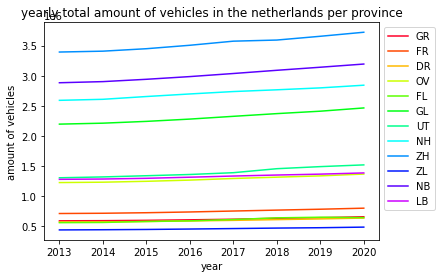

In [42]:
df_vehicles_3.sort_values(by=["YEAR"])
year = df_vehicles_3["YEAR"].unique()
year_2 = range(year.min()+1, year.max()+1)
provinces = df_vehicles_3["PROVINCE"].unique()
n_provinces = len(provinces)

num_colors = n_provinces
cm = plt.get_cmap('gist_rainbow')
colors=[cm(1.*i/num_colors) for i in range(num_colors)]

for i, j in enumerate(provinces):
    line = []
    for k in year_2:
        point = df_vehicles_3[(df_vehicles_3["PROVINCE"] == j) & (df_vehicles_3["YEAR"] == k)]
        line.append(point["TOTAL_VEHICLES"])
    line = np.array(line)
    plt.plot(year_2, line, label=j, color = colors[i])

plt.title("yearly total amount of vehicles in the netherlands per province")
plt.xlabel("year")
plt.ylabel("amount of vehicles")

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

[0.00593302]  =  [20101]  +  [3387988.]
[0.00570352]  =  [19355]  +  [3393521.]
[0.00534281]  =  [18208]  +  [3407947.]
[0.00632629]  =  [21817]  +  [3448626.]
[0.00706881]  =  [24782]  +  [3505825.]
[0.00727637]  =  [26004]  +  [3573758.]
[0.00808088]  =  [29029]  +  [3592305.]
[0.00858814]  =  [31389]  +  [3654925.]
[0.00700088]  =  [26056]  +  [3721818.]
[nan]  =  [29235]  +  [nan]
[0.0049684]  =  [14260]  +  [2870138.]
[0.00536591]  =  [15476]  +  [2884133.]
[0.00519562]  =  [15082]  +  [2902832.]
[0.00593931]  =  [17470]  +  [2941420.]
[0.00639035]  =  [19083]  +  [2986223.]
[0.00607132]  =  [18441]  +  [3037397.]
[0.00620393]  =  [19174]  +  [3090624.]
[0.00636638]  =  [20000]  +  [3141501.]
[0.00443538]  =  [14168]  +  [3194317.]
[nan]  =  [16867]  +  [nan]
[0.00399731]  =  [5117]  +  [1280112.]
[0.00470887]  =  [6036]  +  [1281836.]
[0.0050007]  =  [6436]  +  [1287020.]
[0.0059864]  =  [7776]  +  [1298944.]
[0.00668348]  =  [8804]  +  [1317278.]
[0.0062959]  =  [8416]  +  [1336

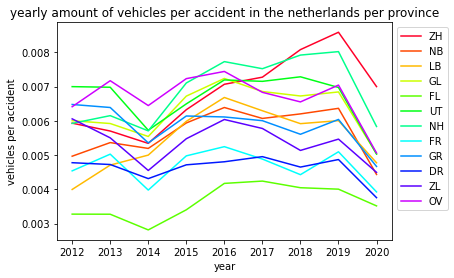

In [43]:
df_7.sort_values(by=["YEAR"])
year = df_7["YEAR"].unique()
year_2 = range(year.min(), year.max()+1)
provinces = df_7["PROVINCE"].unique()
n_provinces = len(provinces)

num_colors = n_provinces
cm = plt.get_cmap('gist_rainbow')
colors=[cm(1.*i/num_colors) for i in range(num_colors)]

for i, j in enumerate(provinces):
    line = []
    for k in year_2:
        accidents = df_7[(df_7["PROVINCE"] == j) & (df_7["YEAR"] == k)]["N_ACCIDENTS"]
        vehicles = df_vehicles_3[(df_vehicles_3["PROVINCE"] == j) & (df_vehicles_3["YEAR"] == k)]["TOTAL_VEHICLES"]
        accidents_per_vehicle = accidents.values / vehicles.values
        print(accidents_per_vehicle, " = ", accidents.values, " + ", vehicles.values)
        line.append(accidents_per_vehicle)
    line = np.array(line)
    plt.plot(year_2, line, label=j, color = colors[i])

plt.title("yearly amount of vehicles per accident in the netherlands per province")
plt.xlabel("year")
plt.ylabel("vehicles per accident")

plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# find correlation with correlation matrix

In [44]:
corr_population = df_7.corr()
mask = np.zeros_like(corr_population, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_population[mask] = np.nan
(corr_population
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')
 .set_precision(2))

C:\Users\Stefan Hobeijn\AppData\Local\Temp\ipykernel_14216\3226969683.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr_population


,YEAR,N_ACCIDENTS,PVE_CODE
YEAR,nan,nan,nan
N_ACCIDENTS,0.08,nan,nan
PVE_CODE,0.00,-0.62,nan


In [45]:
df_population_2["PVE_CODE"] = df_population_2["PROVINCE"].map({"ZH" : 1, "NB" : 2, "LB" : 3, "GL" : 4, "FL" : 5, "UT" : 6, "NH" : 7, "FR" : 8, "GR" : 9, "DR" : 10, "ZL" : 11, "OV" : 12}).astype(int)
corr_population = df_population_2.corr()
mask = np.zeros_like(corr_population, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_population[mask] = np.nan
(corr_population
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

C:\Users\Stefan Hobeijn\AppData\Local\Temp\ipykernel_14216\1241127050.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr_population


,Perioden (jaar),Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal),"Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|Jonger dan 5 jaar (%)","Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|5 tot 10 jaar (%)","Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|10 tot 15 jaar (%)","Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|15 tot 20 jaar (%)","Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|20 tot 25 jaar (%)","Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|25 tot 45 jaar (%)","Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|45 tot 65 jaar (%)","Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|65 tot 80 jaar (%)","Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|80 jaar of ouder (%)",Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Demografische druk|Totale druk (%),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Demografische druk|Groene druk (%),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Demografische druk|Grijze druk (%),Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Totale bevolking|Ongehuwd (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Totale bevolking|Gehuwd (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Totale bevolking|Gescheiden (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Totale bevolking|Verweduwd (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Inwoners 15 jaar of ouder (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Ongehuwd (in % van inwoners 15 jaar of ouder),Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Gehuwd (in % van inwoners 15 jaar of ouder),Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Gescheiden (in % van inwoners 15 jaar of ouder),Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Verweduwd (in % van inwoners 15 jaar of ouder),Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Nederlandse achtergrond (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Totaal met migratieachtergrond (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Westerse migratieachtergrond (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Totaal niet-westerse migratie

In [46]:
corr_vehicles_2 = df_vehicles_3.corr()
mask = np.zeros_like(corr_vehicles_2, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_vehicles_2[mask] = np.nan
(corr_vehicles_2
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

C:\Users\Stefan Hobeijn\AppData\Local\Temp\ipykernel_14216\4197559045.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr_vehicles_2


,YEAR,PASSENGER_VEHICLES,PRIVATE_VEHICLES,COMAPNY_CARS,MOTORCYLES,VEHICLES_WITH_MOPED_LICENCE_PLATE,TOTAL_VEHICLES,PVE_CODE
YEAR,nan,nan,nan,nan,nan,nan,nan,nan
PASSENGER_VEHICLES,0.06,nan,nan,nan,nan,nan,nan,nan
PRIVATE_VEHICLES,0.05,0.99,nan,nan,nan,nan,nan,nan
COMAPNY_CARS,0.08,0.99,0.98,nan,nan,nan,nan,nan
MOTORCYLES,0.03,0.98,0.99,0.98,nan,nan,nan,nan
VEHICLES_WITH_MOPED_LICENCE_PLATE,0.07,0.98,0.98,0.95,0.97,nan,nan,nan
TOTAL_VEHICLES,0.06,1.00,1.00,0.99,0.99,0.98,nan,nan
PVE_CODE,-0.00,-0.72,-0.69,-0.69,-0.62,-0.65,-0.70,nan


In [47]:
df_7 = df_7.sort_values(["YEAR", "PROVINCE"], ignore_index=True)
df_7

,YEAR,PROVINCE,N_ACCIDENTS,PVE_CODE
0,2012,DR,2735,10
1,2012,FL,1855,5
2,2012,FR,3241,8
3,2012,GL,13170,4
4,2012,GR,3855,9
...,...,...,...,...
115,2021,NH,18217,7
116,2021,OV,7418,12
117,2021,UT,8224,6
118,2021,ZH,29235,1


In [48]:
df_population_2 = df_population_2.sort_values(["Perioden (jaar)", "PROVINCE"], ignore_index=True)
df_population_2

,Regio's (naam),Perioden (jaar),Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal),...,Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Immigratie (aantal),Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Emigratie (aantal),Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Migratiesaldo (aantal),"Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Migratiesaldo, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Inwoners op 31 december (aantal),Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Bevolkingsgroei (aantal),"Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Bevolkingsgroei, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Gemiddeld aantal inwoners (aantal),PROVINCE,PVE_CODE
0,Drenthe (PV),2012,489918,242757,247161,24373,28028,31871,28694,22594,...,1993.0,1727.0,266.0,0.5,489918.0,-889.0,-1.8,490362.5,DR,10
1,Flevoland (PV),2012,398441,199314,199127,26280,27642,28941,26916,25247,...,3696.0,2596.0,1100.0,2.8,398441.0,2916.0,7.4,396983.0,FL,5
2,Fryslân (PV),2012,646862,323442,323420,34557,38100,41526,39759,37078,...,3146.0,2706.0,440.0,0.7,646862.0,-352.0,-0.5,647038.0,FR,8
3,Gelderland (PV),2012,2015791,995180,1020611,105831,116689,129072,125131,122838,...,11761.0,10639.0,1122.0,0.6,2015791.0,5046.0,2.5,2013268.0,GL,4
4,Groningen (PV),2012,581705,289275,292430,28423,29156,31929,36337,51319,...,6247.0,5458.0,789.0,1.4,581705.0,830.0,1.4,581290.0,GR,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Noord-Holland (PV),2021,2909827,1438477,1471350,144946,146306,153657,162480,183195,...,NaN,NaN,NaN,NaN,2909827.0,21341.0,7.4,2899156.5,NH,7
116,Overijssel (PV),2021,1171910,589158,582752,57238,61821,67972,75091,77292,...,NaN,NaN,NaN,NaN,1171910.0,5377.0,4.6,1169221.5,OV,12
117,Utrecht (PV),2021,1369873,674377,695496,75624,75934,79395,82129,89884,...,NaN,NaN,NaN,NaN,1369873.0,8720.0,6.4,1365513.0,UT,6
118,Zuid-Holland (PV),2021,3753944,1857303,1896641,196231,201322,207646,216602,249456,...,NaN,NaN,NaN,NaN,3753944.0,27894.0,7.5,3739997.0,ZH,1


In [49]:
df_pop_n_acc_2 = df_population_2
df_pop_n_acc_2["N_ACCIDENTS"] = df_7["N_ACCIDENTS"]
df_pop_n_acc_2

,Regio's (naam),Perioden (jaar),Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal),...,Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Emigratie (aantal),Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Migratiesaldo (aantal),"Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Migratiesaldo, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Inwoners op 31 december (aantal),Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Bevolkingsgroei (aantal),"Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Bevolkingsgroei, relatief (per 1 000 inwoners)",Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Gemiddeld aantal inwoners (aantal),PROVINCE,PVE_CODE,N_ACCIDENTS
0,Drenthe (PV),2012,489918,242757,247161,24373,28028,31871,28694,22594,...,1727.0,266.0,0.5,489918.0,-889.0,-1.8,490362.5,DR,10,2735
1,Flevoland (PV),2012,398441,199314,199127,26280,27642,28941,26916,25247,...,2596.0,1100.0,2.8,398441.0,2916.0,7.4,396983.0,FL,5,1855
2,Fryslân (PV),2012,646862,323442,323420,34557,38100,41526,39759,37078,...,2706.0,440.0,0.7,646862.0,-352.0,-0.5,647038.0,FR,8,3241
3,Gelderland (PV),2012,2015791,995180,1020611,105831,116689,129072,125131,122838,...,10639.0,1122.0,0.6,2015791.0,5046.0,2.5,2013268.0,GL,4,13170
4,Groningen (PV),2012,581705,289275,292430,28423,29156,31929,36337,51319,...,5458.0,789.0,1.4,581705.0,830.0,1.4,581290.0,GR,9,3855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Noord-Holland (PV),2021,2909827,1438477,1471350,144946,146306,153657,162480,183195,...,NaN,NaN,NaN,2909827.0,21341.0,7.4,2899156.5,NH,7,18217
116,Overijssel (PV),2021,1171910,589158,582752,57238,61821,67972,75091,77292,...,NaN,NaN,NaN,1171910.0,5377.0,4.6,1169221.5,OV,12,7418
117,Utrecht (PV),2021,1369873,674377,695496,75624,75934,79395,82129,89884,...,NaN,NaN,NaN,1369873.0,8720.0,6.4,1365513.0,UT,6,8224
118,Zuid-Holland (PV),2021,3753944,1857303,1896641,196231,201322,207646,216602,249456,...,NaN,NaN,NaN,3753944.0,27894.0,7.5,3739997.0,ZH,1,29235


In [50]:
# df_pop_n_acc_2.rename(columns={
#     "Perioden (jaar)" : "YEAR",
#     "Regio's (naam)" : "PROVINCE_NAME",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)" : "TOTAL_POPULATION",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal)" : "N_MEN",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal)" : "N_WOMEN",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar (aantal)" : "UNDER_5_YEAR_OLD",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar (aantal)" : "5_to_10_YEAR_OLD",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar (aantal)" : "10_TO_15_YEAR_OLD",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal)" : "15_TO_20_YEAR_OLD",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal)" : "20_TO_25_YEAR_OLD",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal)" : "25_TO_45_YEAR_OLD",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal)" : "45_TO_65_YEAR_OLD",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal)" : "65_TO_80_YEAR_OLD",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal)" : "80_YEAR_AND_OLDER",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|Jonger dan 5 jaar (%)" : "UNDER_5_YEAR_OLD",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|5 tot 10 jaar (%)" : "5_to_10_YEAR_OLD_%",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|10 tot 15 jaar (%)" : "10_TO_15_YEAR_OLD_%",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|15 tot 20 jaar (%)" : "15_TO_20_YEAR_OLD_%",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|20 tot 25 jaar (%)" : "20_TO_25_YEAR_OLD_%",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|25 tot 45 jaar (%)" : "25_TO_45_YEAR_OLD_%",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|45 tot 65 jaar (%)" : "45_TO_65_YEAR_OLD_%",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|65 tot 80 jaar (%)" : "65_TO_80_YEAR_OLD_%",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|80 jaar of ouder (%)" : "80_YEAR_AND_OLDER_%",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Demografische druk|Totale druk (%)" : "TOTAL_DEMOGRAPHIC_PREASSURE_%",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Demografische druk|Groene druk (%)" : "GREEN_DEMOGRAPHIC_PREASSURE_%",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Demografische druk|Grijze druk (%)" : "GREY_DEMOGRAPHIC_PREASSURE_%",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Totale bevolking|Ongehuwd (aantal)" : "N_UNMARRIED",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Totale bevolking|Gehuwd (aantal)" : "N_MARRIED",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Totale bevolking|Gescheiden (aantal)" : "N_DIVORCED",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Totale bevolking|Verweduwd (aantal)" : "N_WIDOWED",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Inwoners 15 jaar of ouder (aantal)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Ongehuwd (in % van  inwoners 15 jaar of ouder)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Gehuwd (in % van  inwoners 15 jaar of ouder)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Gescheiden (in % van  inwoners 15 jaar of ouder)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Verweduwd (in % van  inwoners 15 jaar of ouder)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Nederlandse achtergrond (aantal)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Totaal met migratieachtergrond (aantal)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Westerse migratieachtergrond (aantal)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Totaal niet-westerse migratieachtergrond (aantal)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Marokko (aantal)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|(voormalige) Nederlandse Antillen, Aruba (aantal)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Suriname (aantal)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Turkije (aantal)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Overig niet-westerse migratieachtergrond (aantal)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond, relatief|Nederlandse achtergrond (%)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond, relatief|Met migratieachtergrond|Totaal met migratieachtergrond (%)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond, relatief|Met migratieachtergrond|Westerse migratieachtergrond (%)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond, relatief|Met migratieachtergrond|Niet-westerse migratieachtergrond|Totaal niet-westerse migratieachtergrond (%)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond, relatief|Met migratieachtergrond|Niet-westerse migratieachtergrond|Marokko (%)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond, relatief|Met migratieachtergrond|Niet-westerse migratieachtergrond|(voormalige) Nederlandse Antillen, Aruba (%)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond, relatief|Met migratieachtergrond|Niet-westerse migratieachtergrond|Suriname (%)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond, relatief|Met migratieachtergrond|Niet-westerse migratieachtergrond|Turkije (%)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond, relatief|Met migratieachtergrond|Niet-westerse migratieachtergrond|Overig niet-westerse migratieachtergrond (%)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Zeer sterk stedelijk (aantal)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Sterk stedelijk (aantal)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Matig stedelijk (aantal)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Weinig stedelijk (aantal)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Niet stedelijk (aantal)" : "",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Geboorte (aantal)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Geboorte, relatief (per 1 000 inwoners)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Sterfte (aantal)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Sterfte, relatief (per 1 000 inwoners)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Geboorteoverschot (aantal)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Geboorteoverschot, relatief (per 1 000 inwoners)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Doodsoorzaken|Nieuwvormingen (aantal)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Doodsoorzaken|Ziekten van hart en vaatstelsel (aantal)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Doodsoorzaken|Ziekten van ademhalingsstelsel (aantal)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Doodsoorzaken|Uitwendige doodsoorzaken (aantal)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Geboorte en sterfte|Doodsoorzaken|Overige doodsoorzaken (aantal)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Verhuizingen|Vestiging uit andere gemeente (aantal)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Verhuizingen|Vertrek naar andere gemeente (aantal)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Verhuizingen|Binnenlands migratiesaldo (aantal)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Verhuizingen|Binnenlands migratiesaldo, relatief (per 1 000 inwoners)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Verhuizingen|Verhuismobiliteit, relatief (per 1 000 inwoners)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Immigratie (aantal)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Emigratie (aantal)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Migratiesaldo (aantal)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Immigratie en emigratie|Migratiesaldo, relatief (per 1 000 inwoners)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Inwoners op 31 december (aantal)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Bevolkingsgroei (aantal)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Bevolkingsgroei, relatief (per 1 000 inwoners)" : "",
#     "Bevolking|Bevolkingsontwikkeling|Bevolkingsgroei|Gemiddeld aantal inwoners (aantal)" : "",
#     "Bevolking|Particuliere huishoudens|Particuliere huishoudens|Totaal aantal particuliere huishoudens (aantal)" : "",
#     "Bevolking|Particuliere huishoudens|Particuliere huishoudens|Eenpersoonshuishoudens (aantal)" : "",
#     "Bevolking|Particuliere huishoudens|Particuliere huishoudens|Huishoudens zonder kinderen (aantal)" : "",
#     "Bevolking|Particuliere huishoudens|Particuliere huishoudens|Huishoudens met kinderen (aantal)" : "",
#     "Bevolking|Particuliere huishoudens|Particuliere huishoudens, relatief|Eenpersoonshuishoudens (%)" : "",
#     "Bevolking|Particuliere huishoudens|Particuliere huishoudens, relatief|Huishoudens zonder kinderen (%)" : "",
#     "Bevolking|Particuliere huishoudens|Particuliere huishoudens, relatief|Huishoudens met kinderen (%)" : "",
#     "Bevolking|Particuliere huishoudens|Gemiddelde huishoudensgrootte (personen per 1 huishouden)" : "",
#     "PROVINCE" : "",
#     "PVE_CODE" : "",
#     "N_ACCIDENTS" : ""
# })

In [51]:
corr_pop_n_acc = df_pop_n_acc_2.corr()
mask = np.zeros_like(corr_pop_n_acc, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_pop_n_acc[mask] = np.nan
(corr_pop_n_acc
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

C:\Users\Stefan Hobeijn\AppData\Local\Temp\ipykernel_14216\4268786421.py:5: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr_pop_n_acc


,Perioden (jaar),Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal),"Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|Jonger dan 5 jaar (%)","Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|5 tot 10 jaar (%)","Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|10 tot 15 jaar (%)","Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|15 tot 20 jaar (%)","Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|20 tot 25 jaar (%)","Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|25 tot 45 jaar (%)"


# apply regression with the chosen features

multiple linear regression

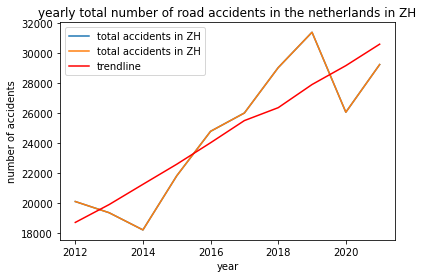

In [52]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)
years = df_pop_n_acc_2["Perioden (jaar)"].unique()

y = df_target["N_ACCIDENTS"].values
x = df_target[["Perioden (jaar)", "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)"]].values

Linear_regression = LinearRegression()
Linear_regression.fit(x, y)

predicted_n_accidents = Linear_regression.predict(x)

plt.title("yearly total number of road accidents in the netherlands in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, df_target["N_ACCIDENTS"].values, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")

plt.legend()
plt.show()

Index(['Perioden (jaar)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|Jonger dan 5 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|5 tot 10 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|10 tot 15 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|4

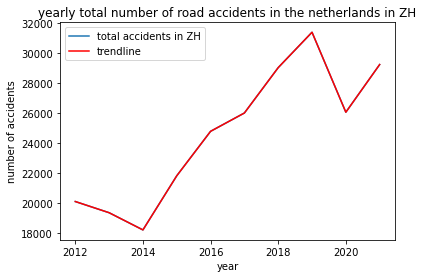

In [53]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

y = df_target["N_ACCIDENTS"].values
x = df_target.drop(columns=["N_ACCIDENTS"])
print(x.columns)
x = x.dropna(axis=1)
print(x.columns)

Linear_regression = LinearRegression()
Linear_regression.fit(x, y)
predicted_n_accidents = Linear_regression.predict(x)

plt.title("yearly total number of road accidents in the netherlands in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")
plt.legend()
plt.show()

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

Index(['Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|10 tot 15 jaar (%)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|15 tot 20 jaar (%)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|45 tot 65 jaar (%)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|65 tot 80 jaar (%)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen, relatief|80 jaar of ouder (%)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Demografische druk|Totale druk (%)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Demografische druk|Groene druk (%)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Demografische druk|Grijze druk (%)',
       'Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Gehuwd (in % van  inwoners 15 jaar 

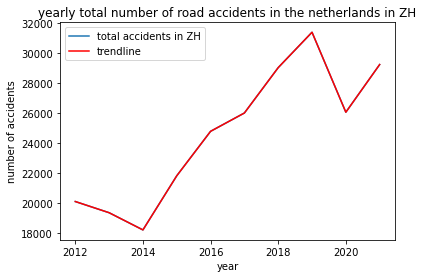

In [54]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

y = df_target["N_ACCIDENTS"].values

df_corr_higher_than = pd.DataFrame(corr_pop_n_acc.loc["N_ACCIDENTS"])
df_corr_higher_than.reset_index(inplace=True)

df_corr_higher_than = df_corr_higher_than.loc[df_corr_higher_than["N_ACCIDENTS"] <= -0.10].reset_index(drop=True)
x = df_target[df_corr_higher_than["index"]]
print(x.columns)

x = x.dropna(axis=1)

Linear_regression = LinearRegression()
Linear_regression.fit(x, y)
predicted_n_accidents = Linear_regression.predict(x)

plt.title("yearly total number of road accidents in the netherlands in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")
plt.legend()
plt.show()

Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)
Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal)
Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal)
Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal)
Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal)
Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal)
Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal)
Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal)
Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal)
Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Inwoners 15 jaar of ouder (aantal)
Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Nederlandse achtergrond (aantal)
Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Totaal met migratieachtergrond (aantal)
Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Westerse migratieachtergrond (aantal)
Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Totaal niet-westerse migratieachtergrond (aantal)
Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Zeer sterk stedelijk (aantal)
Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Sterk stedelijk (aantal)
Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Matig stedelijk (aantal)
Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Weinig stedelijk (aantal)
Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Niet stedelijk (aantal)
Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)

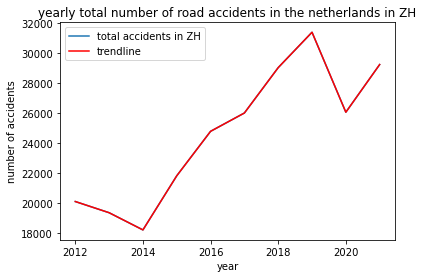

In [55]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)
target_features = df_target[[
    "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Inwoners 15 jaar of ouder (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Nederlandse achtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Totaal met migratieachtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Westerse migratieachtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Totaal niet-westerse migratieachtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Zeer sterk stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Sterk stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Matig stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Weinig stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Niet stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)"
]]

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

y = df_target["N_ACCIDENTS"].values
x = target_features

Linear_regression = LinearRegression()
Linear_regression.fit(x, y)
predicted_n_accidents = Linear_regression.predict(x)

plt.title("yearly total number of road accidents in the netherlands in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")
plt.legend()
plt.show()

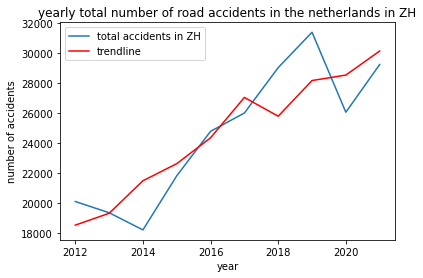

In [56]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)
target_features = df_target[[
    "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal)"
]]

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

y = df_target["N_ACCIDENTS"].values
x = target_features

Linear_regression = LinearRegression()
Linear_regression.fit(x, y)
predicted_n_accidents = Linear_regression.predict(x)

plt.title("yearly total number of road accidents in the netherlands in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")
plt.legend()
plt.show()

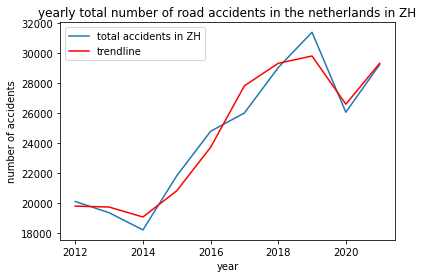

In [57]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)
target_features = df_target[[
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal)"
]]

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

y = df_target["N_ACCIDENTS"].values
x = target_features

Linear_regression = LinearRegression()
Linear_regression.fit(x, y)
predicted_n_accidents = Linear_regression.predict(x)

plt.title("yearly total number of road accidents in the netherlands in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")
plt.legend()
plt.show()

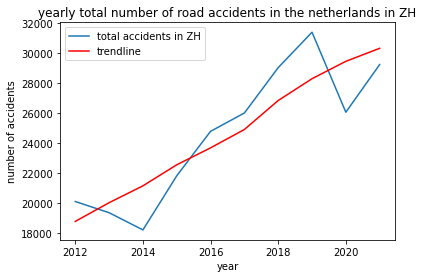

In [58]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)
target_features = df_target[[
    "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Inwoners 15 jaar of ouder (aantal)"
]]

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

y = df_target["N_ACCIDENTS"].values
x = target_features

Linear_regression = LinearRegression()
Linear_regression.fit(x, y)
predicted_n_accidents = Linear_regression.predict(x)

plt.title("yearly total number of road accidents in the netherlands in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")
plt.legend()
plt.show()

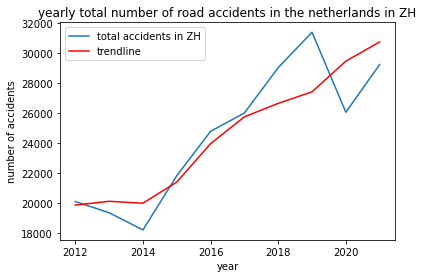

In [59]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)
target_features = df_target[[
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Nederlandse achtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Totaal met migratieachtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Westerse migratieachtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Totaal niet-westerse migratieachtergrond (aantal)"
]]

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

y = df_target["N_ACCIDENTS"].values
x = target_features

Linear_regression = LinearRegression()
Linear_regression.fit(x, y)
predicted_n_accidents = Linear_regression.predict(x)

plt.title("yearly total number of road accidents in the netherlands in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")
plt.legend()
plt.show()

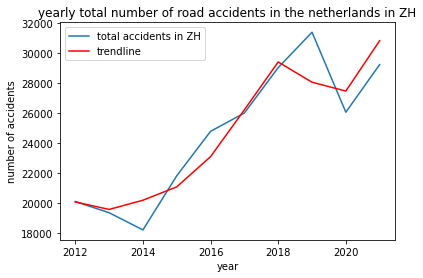

In [60]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)
target_features = df_target[[
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Zeer sterk stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Sterk stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Matig stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Weinig stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Niet stedelijk (aantal)"
]]

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

y = df_target["N_ACCIDENTS"].values
x = target_features

Linear_regression = LinearRegression()
Linear_regression.fit(x, y)
predicted_n_accidents = Linear_regression.predict(x)

plt.title("yearly total number of road accidents in the netherlands in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")
plt.legend()
plt.show()

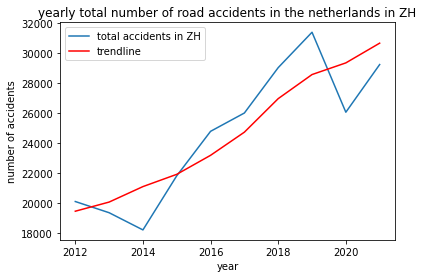

In [61]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)
target_features = df_target[[
    "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)"
]]

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

y = df_target["N_ACCIDENTS"].values
x = target_features

Linear_regression = LinearRegression()
Linear_regression.fit(x, y)
predicted_n_accidents = Linear_regression.predict(x)

plt.title("yearly total number of road accidents in the netherlands in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")
plt.legend()
plt.show()

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

# multiple linear regression scoring with cross validation

In [62]:
target_province = "ZH"
df_target = df_pop_n_acc_2
df_target = df_target[[
    "Perioden (jaar)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Inwoners 15 jaar of ouder (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Nederlandse achtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Totaal met migratieachtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Westerse migratieachtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Totaal niet-westerse migratieachtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Zeer sterk stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Sterk stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Matig stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Weinig stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Niet stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)",
    "PVE_CODE",
    "N_ACCIDENTS",
]]

corr_target = df_target.corr()
mask = np.zeros_like(corr_target, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_target[mask] = np.nan
(corr_target
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

C:\Users\Stefan Hobeijn\AppData\Local\Temp\ipykernel_14216\1300266870.py:33: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr_target


,Perioden (jaar),Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Inwoners 15 jaar of ouder (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Nederlandse achtergrond (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Totaal met migratieachtergrond (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Westerse migratieachtergrond (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Totaal niet-westerse migratieachtergrond (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Zeer sterk stedelijk (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Sterk stedelijk (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Matig stedelijk (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Weinig stedelijk (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Niet stedelijk (aantal),Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²),PVE_CODE,N_ACCIDENTS
Perioden (jaar),nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal),0.02,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal),0.02,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal),0.02,1.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal),0.02,1.00,1.00,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal),0.03,1.00,0.99,1.00,0.99,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal),0.01,1.00,0.99,1.00,0.99,0.99,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal),0.01,1.00,1.00,1.00,1.00,0.99,0.99,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal),0.10,0.99,0.99,0.99,0.99,0.98,0.97,0.99,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal),0.09,0.99,0.99,0.99,0.99,0.98,0.97,0.99,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [63]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

x = df_target[["Perioden (jaar)", "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)"]].values
y = df_target["N_ACCIDENTS"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, train_size=0.6)

Linear_regression = LinearRegression()


cross_val_score(Linear_regression, x, y, scoring="r2", cv=5)

array([-16.68375289,  -1.96513713,  -6.76016751, -25.84466998,
       -10.46548348])

In [64]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

target_features = df_target[[
    "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Inwoners 15 jaar of ouder (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Nederlandse achtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Totaal met migratieachtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Westerse migratieachtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Totaal niet-westerse migratieachtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Zeer sterk stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Sterk stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Matig stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Weinig stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Niet stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)"
]]

y = df_target["N_ACCIDENTS"].values
x = target_features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, train_size=0.6)

Linear_regression = LinearRegression()


cross_val_score(Linear_regression, x, y, scoring="r2", cv=5)

array([-7.58828556e+02,  8.89861405e-02, -1.69121438e+01, -1.10094726e+01,
       -1.15601621e+01])

In [65]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

target_features = df_target[[
    "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)", #3
    "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal)", #1
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal)", #1
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal)", #1
    "Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Inwoners 15 jaar of ouder (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Nederlandse achtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Totaal met migratieachtergrond (aantal)", #1
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Westerse migratieachtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Totaal niet-westerse migratieachtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Zeer sterk stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Sterk stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Matig stedelijk (aantal)", #2
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Weinig stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Niet stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)" #2 #3
]]

y = df_target["N_ACCIDENTS"].values
x = target_features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, train_size=0.6)

Linear_regression = LinearRegression()
Linear_regression.fit(x_train, y_train)

predicted_n_accidents = Linear_regression.predict(x_test)
score_test = r2_score(y_test, predicted_n_accidents)

predicted_n_accidents = Linear_regression.predict(x)
score_tot = r2_score(y, predicted_n_accidents)
print("score test data: ", score_test)
print("score all data: ", score_tot)

score test data:  -1.1760137972293037
score all data:  0.7339797843301092


using features with all gives: 1.0 <br>
this is done by just using all features and seing what happens

using features with #1 gives: 0.9385976588338986 <br>
this is done by targeting in on a specific group of people <br>

using features with #2 gives: 0.7911328167379198 <br>
using features with #3 gives: 0.7945699652939545 <br>
these are done by looking at the correlation matrix and seing what has a strong correlatio with N_ACCIDENTS and a low correlatio with eachother

In [66]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

target_features = df_target[[
    "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal)",
]]

y = df_target["N_ACCIDENTS"].values
x = target_features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, train_size=0.6)

Linear_regression = LinearRegression()
Linear_regression.fit(x_train, y_train)

predicted_n_accidents = Linear_regression.predict(x_test)
score_test = r2_score(y_test, predicted_n_accidents)

predicted_n_accidents = Linear_regression.predict(x)
score_tot = r2_score(y, predicted_n_accidents)
print("score test data: ", score_test)
print("score all data: ", score_tot)

score test data:  0.4723217067877413
score all data:  0.6947512212437033


score test data:  -0.2555615308208623
score all data:  0.7793176916378498


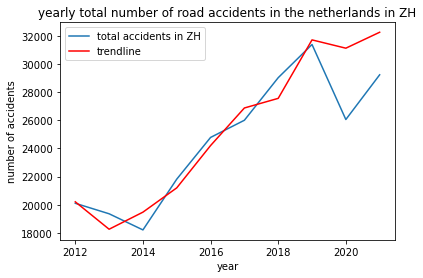

In [67]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

target_features = df_target[[
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal)",
]]

y = df_target["N_ACCIDENTS"].values
x = target_features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, train_size=0.6)

Linear_regression = LinearRegression()
Linear_regression.fit(x_train, y_train)

predicted_n_accidents = Linear_regression.predict(x_test)
score_test = r2_score(y_test, predicted_n_accidents)

predicted_n_accidents = Linear_regression.predict(x)
score_tot = r2_score(y, predicted_n_accidents)
print("score test data: ", score_test)
print("score all data: ", score_tot)

plt.title("yearly total number of road accidents in the netherlands in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")
plt.legend()
plt.show()

15-20, 65-80 and 80-up together give 0.92 <br>
using the other three only increases the score by 0.05

In [68]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

target_features = df_target[[
    "Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Inwoners 15 jaar of ouder (aantal)",
]]

y = df_target["N_ACCIDENTS"].values
x = target_features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, train_size=0.6)

Linear_regression = LinearRegression()
Linear_regression.fit(x_train, y_train)

predicted_n_accidents = Linear_regression.predict(x_test)
score_test = r2_score(y_test, predicted_n_accidents)

predicted_n_accidents = Linear_regression.predict(x)
score_tot = r2_score(y, predicted_n_accidents)
print("score test data: ", score_test)
print("score all data: ", score_tot)

score test data:  0.7802318779187949
score all data:  0.7522571092438148


In [69]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

target_features = df_target[[
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Nederlandse achtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Totaal met migratieachtergrond (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Westerse migratieachtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Totaal niet-westerse migratieachtergrond (aantal)",
]]

y = df_target["N_ACCIDENTS"].values
x = target_features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, train_size=0.6)

Linear_regression = LinearRegression()
Linear_regression.fit(x_train, y_train)

predicted_n_accidents = Linear_regression.predict(x_test)
score_test = r2_score(y_test, predicted_n_accidents)

predicted_n_accidents = Linear_regression.predict(x)
score_tot = r2_score(y, predicted_n_accidents)
print("score test data: ", score_test)
print("score all data: ", score_tot)

score test data:  0.5387508843604314
score all data:  0.6534124397892612


In [70]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

target_features = df_target[[
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Zeer sterk stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Sterk stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Matig stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Weinig stedelijk (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Niet stedelijk (aantal)",
]]

y = df_target["N_ACCIDENTS"].values
x = target_features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, train_size=0.6)

Linear_regression = LinearRegression()
Linear_regression.fit(x_train, y_train)

predicted_n_accidents = Linear_regression.predict(x_test)
score_test = r2_score(y_test, predicted_n_accidents)

predicted_n_accidents = Linear_regression.predict(x)
score_tot = r2_score(y, predicted_n_accidents)
print("score test data: ", score_test)
print("score all data: ", score_tot)

score test data:  -4.411124477189136
score all data:  -0.6071776908073538


In [71]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

target_features = df_target[[
    "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)"
]]

y = df_target["N_ACCIDENTS"].values
x = target_features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, train_size=0.6)

Linear_regression = LinearRegression()
Linear_regression.fit(x_train, y_train)

predicted_n_accidents = Linear_regression.predict(x_test)
score_test = r2_score(y_test, predicted_n_accidents)

predicted_n_accidents = Linear_regression.predict(x)
score_tot = r2_score(y, predicted_n_accidents)
print("score test data: ", score_test)
print("score all data: ", score_tot)

score test data:  0.7125321100522848
score all data:  0.7836073810721316


# trying new types of regression

sdg_regression

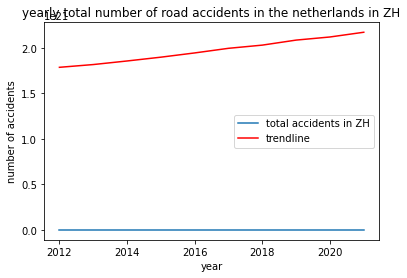

In [72]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

target_features = df_target[[
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)", #3
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal)", #1
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal)", #1
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal)", #1
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Inwoners 15 jaar of ouder (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Nederlandse achtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Totaal met migratieachtergrond (aantal)", #1
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Westerse migratieachtergrond (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Totaal niet-westerse migratieachtergrond (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Zeer sterk stedelijk (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Sterk stedelijk (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Matig stedelijk (aantal)", #2
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Weinig stedelijk (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Niet stedelijk (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)" #2 #3
]]

y = df_target["N_ACCIDENTS"].values
x = target_features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, train_size=0.6)

Linear_regression = SGDRegressor()
Linear_regression.fit(x_train, y_train)
predicted_n_accidents = Linear_regression.predict(x)

r2_score(y, predicted_n_accidents)


plt.title("yearly total number of road accidents in the netherlands in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")
plt.legend()
plt.show()

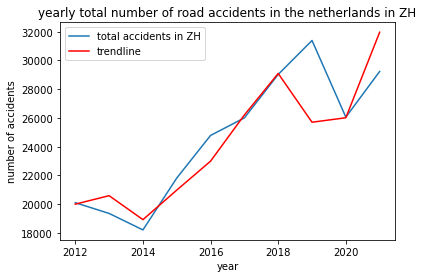

In [73]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

target_features = df_target[[
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)", #3
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Mannen (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Geslacht|Vrouwen (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal)", #1
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|20 tot 25 jaar (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|25 tot 45 jaar (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|45 tot 65 jaar (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal)", #1
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal)", #1
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Burgerlijke staat|Bevolking 15 jaar of ouder|Inwoners 15 jaar of ouder (aantal)",
    # "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Nederlandse achtergrond (aantal)",
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Totaal met migratieachtergrond (aantal)", #1
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Westerse migratieachtergrond (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Niet-westerse migratieachtergrond|Totaal niet-westerse migratieachtergrond (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Zeer sterk stedelijk (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Sterk stedelijk (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Matig stedelijk (aantal)", #2
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Weinig stedelijk (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Niet stedelijk (aantal)",
#     "Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)" #2 #3
]]

y = df_target["N_ACCIDENTS"].values
x = target_features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, train_size=0.6)

Linear_regression = Ridge()
Linear_regression.fit(x_train, y_train)
predicted_n_accidents = Linear_regression.predict(x)

r2_score(y, predicted_n_accidents)


plt.title("yearly total number of road accidents in the netherlands in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")
plt.legend()
plt.show()

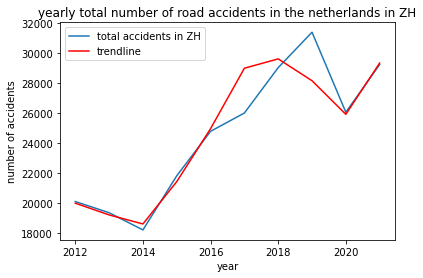

In [74]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

target_features = df_target[[
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|15 tot 20 jaar (aantal)", #1
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|65 tot 80 jaar (aantal)", #1
    "Bevolking|Bevolkingssamenstelling op 1 januari|Leeftijd|Leeftijdsgroepen|80 jaar of ouder (aantal)", #1
    "Bevolking|Bevolkingssamenstelling op 1 januari|Migratieachtergrond|Migratieachtergrond|Met migratieachtergrond|Totaal met migratieachtergrond (aantal)", #1
]]

y = df_target["N_ACCIDENTS"].values
x = target_features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, train_size=0.6)

Linear_regression = Ridge()
Linear_regression.fit(x_train, y_train)
predicted_n_accidents = Linear_regression.predict(x)

r2_score(y, predicted_n_accidents)


plt.title("yearly total number of road accidents in the netherlands in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")
plt.legend()
plt.show()

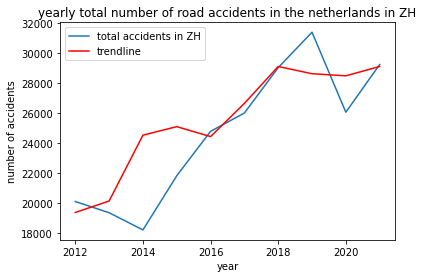

In [75]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

target_features = df_target[[
    "Bevolking|Bevolkingssamenstelling op 1 januari|Stedelijkheidsklasse|Matig stedelijk (aantal)", #2
    "Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)" #2
]]

y = df_target["N_ACCIDENTS"].values
x = target_features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, train_size=0.6)

Linear_regression = Ridge()
Linear_regression.fit(x_train, y_train)
predicted_n_accidents = Linear_regression.predict(x)

r2_score(y, predicted_n_accidents)


plt.title("yearly total number of road accidents in the netherlands in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")
plt.legend()
plt.show()

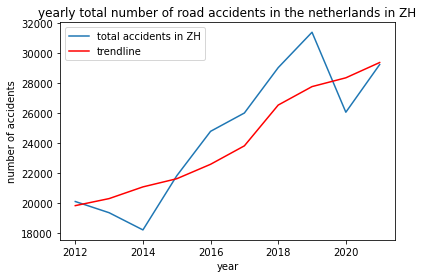

In [76]:
target_province = "ZH"
df_target = df_pop_n_acc_2[df_pop_n_acc_2["PROVINCE"] == target_province]
df_target = df_target.drop(["Regio's (naam)", "PROVINCE"], axis=1)

years = df_pop_n_acc_2["Perioden (jaar)"].unique()

target_features = df_target[[
    "Bevolking|Bevolkingssamenstelling op 1 januari|Totale bevolking (aantal)", #3
    "Bevolking|Bevolkingssamenstelling op 1 januari|Bevolkingsdichtheid (aantal inwoners per km²)" #3
]]

y = df_target["N_ACCIDENTS"].values
x = target_features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, train_size=0.6)

Linear_regression = Ridge()
Linear_regression.fit(x_train, y_train)
predicted_n_accidents = Linear_regression.predict(x)

r2_score(y, predicted_n_accidents)


plt.title("yearly total number of road accidents in the netherlands in " + target_province)
plt.xlabel("year")
plt.ylabel("number of accidents")

plt.plot(years, y, label="total accidents in " + target_province)
plt.plot(years, predicted_n_accidents, color="red", label="trendline")
plt.legend()
plt.show()